**Contacts for any questions:** dolmatov.ki@gmail.com

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
sns.set_style("darkgrid")

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Загрузка данных

Для выполнения этого задания вам понадобятся данные о кредитных историях клиентов одного из банков. Поля в предоставляемых данных имеют следующий смысл:

* LIMIT_BAL: размер кредитного лимита (в том числе и на семью клиента)
* SEX: пол клиента (1 = мужской, 2 = женский )
* EDUCATION: образование (0 = доктор, 1 = магистр; 2 = бакалавр; 3 = выпускник школы; 4 = начальное образование; 5= прочее; 6 = нет данных ).
* MARRIAGE: (0 = отказываюсь отвечать; 1 = замужем/женат; 2 = холост; 3 = нет данных).
* AGE: возраст в годах
* PAY_0 - PAY_6 : История прошлых платежей по кредиту. PAY_6 - платеж в апреле, ... Pay_0 - платеж в сентябре. Платеж = (0 = исправный платеж, 1=задержка в один месяц, 2=задержка в 2 месяца ...)
* BILL_AMT1 - BILL_AMT6: задолженность, BILL_AMT6 - на апрель, BILL_AMT1 - на сентябрь
* PAY_AMT1 - PAY_AMT6: сумма уплаченная в PAY_AMT6 - апреле, ..., PAY_AMT1 - сентябре
* default - индикатор невозврата денежных средств

In [3]:
data = pd.read_csv('credit_card_default_analysis.csv')

In [4]:
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,1,20000,2,2,1,24,2,2,0,0,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,0,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,0,0,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


### Задание 1
Размер кредитного лимита (**LIMIT_BAL**). В двух группах, тех людей, кто вернул кредит (default = 0) и тех, кто его не вернул (default = 1) проверьте гипотезы:
* a) о равенстве медианных значений кредитного лимита с помощью подходящей интервальной оценки 
* b) о равенстве распределений с помощью одного из подходящих непараметрических критериев проверки равенства средних. Значимы ли полученные результаты с практической точки зрения ?

In [5]:
non_default_lb = data[data.default == 0].LIMIT_BAL.values
default_lb = data[data.default == 1].LIMIT_BAL.values

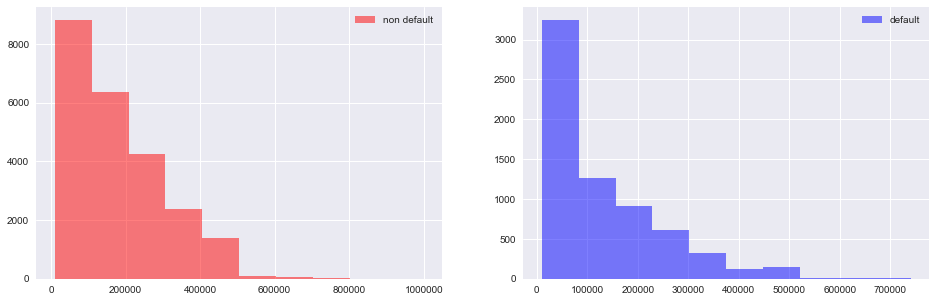

In [6]:
pylab.figure(figsize(16, 5))

pylab.subplot(1,2,1)
pylab.hist(non_default_lb, color = 'r', label = 'non default', alpha=0.5)
pylab.legend()

pylab.subplot(1,2,2)
pylab.hist(default_lb, color = 'b', label = 'default', alpha=0.5)
pylab.legend();

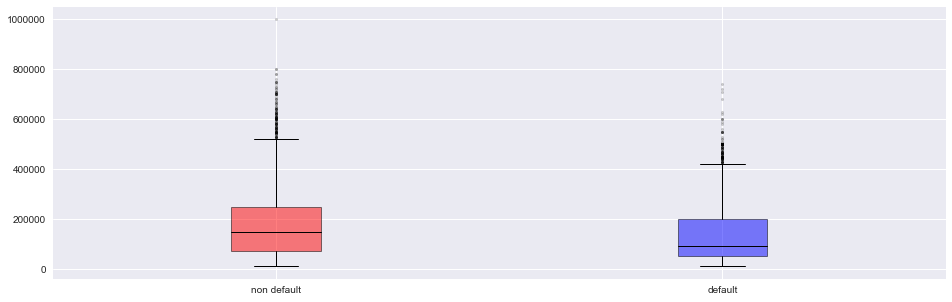

In [7]:
fig = plt.figure(1, figsize=(16, 5))
ax = fig.add_subplot(111)

bp = ax.boxplot([non_default_lb, default_lb], 
                patch_artist=True,  
                widths=0.2,
                showfliers=True,
                sym='k.')

for patch, color in zip(bp['boxes'], ['r', 'b']):
    patch.set_facecolor(color)
    patch.set_alpha(0.5)
    
for median in bp['medians']:
    median.set(color='k', linewidth=1)

    
for flier in bp['fliers']: 
    flier.set(marker='.', alpha=0.2)
    
ax.set_xticklabels(['non default', 'default']);

Про распределение такой статистики как медиана нам ничего неизвестно, поэтому самым лучшим решением для выполнения интервальной оценки является использование метода **Bootstap**

* **гипотеза $H_0$:** медианы LIMIT_BAL у людей, кто вернул и не вернул кредит одинаковы.
* **гипотеза $H_1$:** медианы LIMIT_BAL у людей, кто вернул и не вернул кредит различны.
* **уровень значимости:** 0.05

##### Bootstrap

In [8]:
def get_bootstrap_samples(data, n_samples):
    indices = np.random.randint(0, len(data), (n_samples, len(data)))
    samples = data[indices]
    return samples

#### Интервальная оценка медианы

In [9]:
def stat_intervals(stat, alpha):
    boundaries = np.percentile(stat, [100 * alpha / 2., 100 * (1 - alpha / 2.)])
    return boundaries

In [10]:
np.random.seed(0)

non_default_lb_median_scores = list(map(np.median, get_bootstrap_samples(non_default_lb, 1000)))
default_lb_median_scores = list(map(np.median, get_bootstrap_samples(default_lb, 1000)))

print("95% confidence interval for the non default median LIMIT_BAL:",  stat_intervals(non_default_lb_median_scores, 0.05)) 
print("95% confidence interval for the default median LIMIT_BAL:",  stat_intervals(default_lb_median_scores, 0.05)) 

95% confidence interval for the non default median LIMIT_BAL: [ 150000.  150000.]
95% confidence interval for the default median LIMIT_BAL: [ 80000.  90000.]


Доверительный интвервал медианы LIMIT_BAL для людей, вернувших кредит, лежит намного правее, чем аналогичный интервал для людей не вернувших кредит. Таким образом, гипотеза $H_0$ при заданном уровне значимости отвергается. Доверительный интервал медианы LIMIT_BAL для людей, вернувших кредит, сжался в точку. На мой вгзгляд, это связано с тем, что у нас достаточно большой объем выборки 23k.

#### Интервальная оценка разности медиан

In [11]:
delta_median_scores = list(map(lambda x: x[0] - x[1], zip(non_default_lb_median_scores, default_lb_median_scores)))
print("95% confidence interval for the difference between medians",  stat_intervals(delta_median_scores, 0.05)) 

95% confidence interval for the difference between medians [ 60000.  70000.]


Таким образом, с 95% вероятностью можно утверждать, что медианы рассматриваемых величин не равны. Кроме того, с вероятностью 95% можно утверждать, что разница между медианами рассматриваемых случайных величин лежит в интервале [60000. 70000.]

#### Проверка гипотезы о равенстве распределений на основе непараметрического критерия равенства средних

В качестве критерия будем использовать ранговый критерий **Манна-Уитни**
* **гипотеза $H_0$**: средние значения LIMIT_BAL для людей вернувших и невернувших кредит равны
* **гипотеза $H_1$**: средние значения LIMIT_BAL для людей вернувших и невернувших кредит не равны
* **уровень значимости:** 0.05

In [12]:
stats.mannwhitneyu(non_default_lb, default_lb)

MannwhitneyuResult(statistic=59257217.5, pvalue=6.1277429091116516e-190)

Значение достигаемого уровня значимости согласно критерию Манна-Уитни получилось крайне малым. Таким образом, при заданном уровне значимости гипотеза **$H_0$** может быть отвергнута. Оценим также практическую значимость анализируемого показатели среди двух представленных групп. 

**Ответ:**
- Гипотеза о равенстве медианных значений кредитного лимита - отвергается
- Гипотеза о равенстве распределений - отвергается
- Практическая значимость: максимум доверительного интвервала для разности медиан равен 70k, что, на мой взгляд, не очень много для банка, однако, если сравнивать распределения, то для вернувших долг заемщиков оно имеет не только более тяжелые хвосты справа, но и смещено в целом.

---

### Задание 2

Пол (**SEX**): Проверьте гипотезу о том, что гендерный состав группы людей вернувших и не вернувших кредит отличается. Хорошо, если вы предоставите несколько различных решений этой задачи (с помощью доверительного интервала и подходящего статистического критерия)

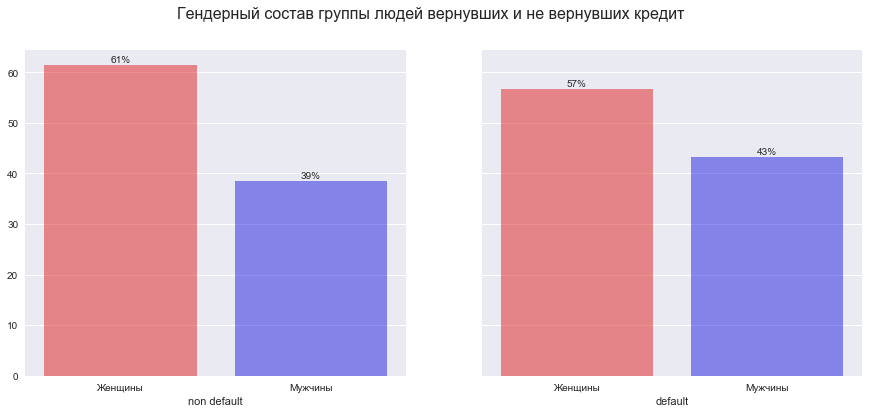

In [13]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True, figsize=(15, 6))
fig.suptitle('Гендерный состав группы людей вернувших и не вернувших кредит', size=16)
n_non_default = len(data[data.default==0])
n_default = len(data[data.default==1])
sns.barplot(x="SEX", 
            y="SEX", 
            data=data[data.default==0], 
            estimator=lambda x: len(x) / n_non_default * 100, 
            ax=ax1, 
            order=[2,1],
            palette={1:'b', 2:'r'},
            alpha=0.5)

sns.barplot(x="SEX", 
            y="SEX", 
            data=data[data.default==1], 
            estimator=lambda x: len(x) / n_default * 100, 
            ax=ax2, order=[2,1], 
            palette={1:'b', 2:'r'}, 
            alpha=0.5)

for p in ax1.patches:
    height = p.get_height()
    ax1.text(p.get_x() + p.get_width() / 2., height + 0.5, '{:1.0f}%'.format(height), ha="center")

for p in ax2.patches:
    height = p.get_height()
    ax2.text(p.get_x() + p.get_width() / 2., height + 0.5, '{:1.0f}%'.format(height), ha="center")
    
ax1.set(xlabel='non default', ylabel='')
ax2.set(xlabel='default', ylabel='')
ax1.set_xticklabels(['Женщины', 'Мужчины'])
ax2.set_xticklabels(['Женщины', 'Мужчины']);

Для проверки гипотезы об отличии гендерного состава одной группу от другой будем использовать **Z-критерий**:
* **гипотеза $H_0$**: соотношения мужчин и женщин среди рассматриваемых групп равны
* **гипотеза $H_1$**: соотношения мужчин и женщин среди рассматриваемых групп не равны
* **уровень значимости:** 0.05

In [14]:
def proportions_diff_z_stat_ind(sample1, sample2):
    n1 = len(sample1)
    n2 = len(sample2)
    
    p1 = float(sum(sample1)) / n1
    p2 = float(sum(sample2)) / n2 
    P = float(p1*n1 + p2*n2) / (n1 + n2)
    
    return (p1 - p2) / np.sqrt(P * (1 - P) * (1. / n1 + 1. / n2))

In [15]:
def proportions_diff_z_test(z_stat, alternative='two-sided'):
    if alternative not in ('two-sided', 'less', 'greater'):
        raise ValueError("alternative not recognized should be 'two-sided', 'less' or 'greater'")
    
    if alternative == 'two-sided':
        return 2 * (1 - stats.norm.cdf(np.abs(z_stat)))
    
    if alternative == 'less':
        return stats.norm.cdf(z_stat)

    if alternative == 'greater':
        return 1 - stats.norm.cdf(z_stat)

Для применения Z-критерия необходимо, чтобы выборки подчинялись закону распределения Бернулли, поэтому заменим значения переменных

In [16]:
labels = {'SEX': {2: 0}}
data.replace(labels, inplace=True)

In [17]:
non_default_sex = data[data.default == 0].SEX.values
default_sex = data[data.default == 1].SEX.values

In [18]:
print("p-value: %e" % proportions_diff_z_test(proportions_diff_z_stat_ind(non_default_sex, default_sex))) 

p-value: 4.472867e-12


Достигаемый уровень значимости получился крайне малым. Таким образом, при заданном уровне значимости гипотеза **$H_0$** отвергается. Построим доверительный интервал, также с помощью **Z-критерия**. 

In [19]:
def proportions_diff_confint_ind(sample1, sample2, alpha=0.05):    
    z = stats.norm.ppf(1 - alpha / 2.)
    
    p1 = float(sum(sample1)) / len(sample1)
    p2 = float(sum(sample2)) / len(sample2)
    
    left_boundary = (p1 - p2) - z * np.sqrt(p1 * (1 - p1) / len(sample1) + p2 * (1 - p2) / len(sample2))
    right_boundary = (p1 - p2) + z * np.sqrt(p1 * (1 - p1) / len(sample1) + p2 * (1 - p2) / len(sample2))
    
    return (left_boundary, right_boundary)

In [20]:
print("95%% confidence interval for a difference between proportions: [%f, %f]" % 
      proportions_diff_confint_ind(non_default_sex, default_sex)) 

95% confidence interval for a difference between proportions: [-0.060548, -0.033635]


Доверительный интервал полностью находится левее нуля. Таким образом, при заданном уровне значимости гипотеза **$H_0$** отвергается, в пользу альтернативной, т.е. гендерные составы рассматриваемых групп не равны.

**Ответ:**
- Гипотеза о том, что гендерный состав группы людей вернувших и не вернувших кредит не отличается - отвергается

---

### Задание 3

Образование (**EDUCATION**): Проверьте гипотезу о том, что образование не влияет на то, вернет ли человек долг. Предложите способ наглядного представления разницы в ожидаемых и наблюдаемых значениях количества человек вернувших и не вернувших долг. Например, составьте таблицу сопряженности "образование" на "возврат долга", где значением ячейки была бы разность между наблюдаемым и ожидаемым количеством человек. Как бы вы предложили модифицировать таблицу так, чтобы привести значения ячеек к одному масштабу не потеряв в интерпретируемости ? Наличие какого образования является наилучшим индикатором того, что человек отдаст долг ? наоборт, не отдаст долг ?

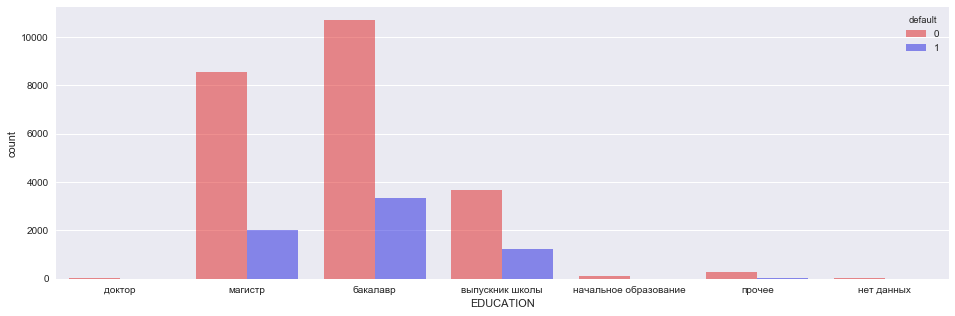

In [21]:
ax = sns.countplot(x="EDUCATION", hue="default", data=data, palette=['r', 'b'], alpha=0.5)
ax.set_xticklabels(['доктор', 'магистр', 'бакалавр', 'выпускник школы', 'начальное образование', 'прочее', 'нет данных']);

In [22]:
contingency_table = data.pivot_table(index='EDUCATION', columns='default', aggfunc=len, fill_value=0)['ID']

In [23]:
contingency_table

default,0,1
EDUCATION,,
0,14,0
1,8549,2036
2,10700,3330
3,3680,1237
4,116,7
5,262,18
6,43,8


Чтобы вычислить ожидаемые значения воспользуемся методом **chi2_contingency** из библиотеки scipy. 

In [24]:
chi2, p, dof, expected = stats.chi2_contingency(np.array(contingency_table))

In [25]:
expected

array([[  1.09032000e+01,   3.09680000e+00],
       [  8.24359800e+03,   2.34140200e+03],
       [  1.09265640e+04,   3.10343600e+03],
       [  3.82935960e+03,   1.08764040e+03],
       [  9.57924000e+01,   2.72076000e+01],
       [  2.18064000e+02,   6.19360000e+01],
       [  3.97188000e+01,   1.12812000e+01]])

In [26]:
contingency_table_diff = contingency_table.add(-expected)

In [27]:
contingency_table_diff

default,0,1
EDUCATION,,
0,3.0968,-3.0968
1,305.4020,-305.4020
2,-226.5640,226.5640
3,-149.3596,149.3596
4,20.2076,-20.2076
5,43.9360,-43.9360
6,3.2812,-3.2812


Для приведения разниц к одному мастштабу нормируем их на корень из ожидаемых частот

In [28]:
contingency_table_diff_standardized = contingency_table_diff.divide(np.sqrt(expected))

In [29]:
contingency_table_diff_standardized

default,0,1
EDUCATION,,
0,0.937856,-1.759773
1,3.363671,-6.311519
2,-2.167450,4.066956
3,-2.413627,4.528876
4,2.064663,-3.874089
5,2.975285,-5.582760
6,0.520637,-0.976911


Прежде чем анализировать полученные нормированные остатки, следует сформулировать гипотезы:
* **гипотеза $H_0$**: анализируемые признаки являются независимыми
* **гипотеза $H_1$**: анализируемые признаки не являются независимыми
* **уровень значимости:** 0.05

In [30]:
p

1.2332626245415605e-32

Достигаемый уровень значимости получился крайне малым. Таким образом, при заданном уровне значимости гипотеза **$H_0$** отвергается.

Для того, чтобы определить наличие какого образования является наилучшим индикатором того, человек вернет долг нужно:
- Найти наиболее сильные отклонения от ожидаемых значений - это будет свидетельствовать о более сильной связи
- Выбрать то значение образования, по которму наибольшее положительное отклонения для возврата долга и наименьшее отрицательне отклонение для невозврата долга

Для этого, умножим второй столбец таблицы сопряженности (default==1) на -1, возьмем сумму по столбцам, для каждой из строчек и выберем максимум.

In [31]:
arr = np.array(contingency_table_diff_standardized)

In [32]:
arr[:,1] *= -1

In [33]:
np.sum(arr, axis=1)

array([ 2.69762873,  9.67518958, -6.23440635, -6.94250299,  5.9387524 ,
        8.55804444,  1.49754766])

In [34]:
np.argmax(np.sum(arr, axis=1))

1

Таким образом, наличие образования "1" (Магистр) является наилучшим индикатором того, что человек отдаст долг.
Аналогично расчитаем, что не отдаст долг.

In [35]:
arr = np.array(contingency_table_diff_standardized)
arr[:,0] *= -1
np.sum(arr, axis=1)

array([-2.69762873, -9.67518958,  6.23440635,  6.94250299, -5.9387524 ,
       -8.55804444, -1.49754766])

In [36]:
np.argmax(np.sum(arr, axis=1))

3

Таким образом, наличие образования "3" (Выпускник школы) является наилучшим индикатором того, что человек не отдаст долг.

**Ответ:**
- Гипотеза о том, что образование не влияет на то, вернет ли человек долг - отвергается.
- Наличие образования "1" (Магистр) является наилучшим индикатором того, что человек отдаст долг.
- Наличие образования "3" (Выпускник школы) является наилучшим индикатором того, что человек не отдаст долг.


---

### Задание 4

Семейное положение (**MARRIAGE**): Проверьте, как связан семейный статус с индикатором дефолта: нужно предложить меру, по которой можно измерить возможную связь этих переменных и посчитать ее значение.

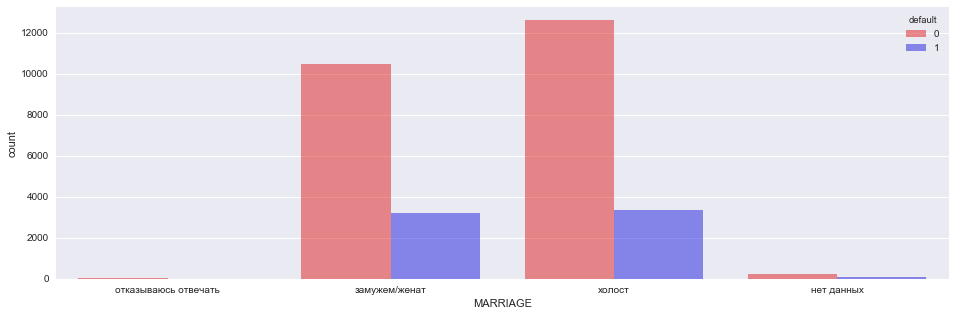

In [37]:
ax = sns.countplot(x="MARRIAGE", hue="default", data=data, palette=['r', 'b'], alpha=0.5)
ax.set_xticklabels(['отказываюсь отвечать', 'замужем/женат', 'холост', 'нет данных']);

В качестве меры для измерения возможной связи рассматриваемых переменных будем использовать коэффициент V Крамера

In [38]:
contingency_table = data.pivot_table(index='MARRIAGE', columns='default', aggfunc=len, fill_value=0)['ID']

In [39]:
chi2, p, dof, expected = stats.chi2_contingency(np.array(contingency_table))

Прежде чем измерять возможную связь между признаками, следует сформулировать гипотезы:
* **гипотеза $H_0$**: анализируемые признаки являются независимыми
* **гипотеза $H_1$**: анализируемые признаки не являются независимыми
* **уровень значимости:** 0.05

In [40]:
p

8.8258624575773752e-08

Достигаемый уровень значимости получился крайне малым. Таким образом, при заданном уровне значимости гипотеза **$H_0$** отвергается.

In [41]:
cramer = np.sqrt(chi2 / ((contingency_table.sum().sum()) * (min(contingency_table.shape)-1)))

In [42]:
cramer

0.034478203662766466

**Ответ:**
- В качестве меры предложен коэффициент V Крамера.
- Значение коэфициента получилось довольно небольшим, поэтому связь рассматриваемых переменных можно считать незначительной.

---

### Задание 5  

Возраст (**AGE**): Относительно двух групп людей вернувших и не вернувших кредит проверьте следующие гипотезы: 
* a) о равенстве медианных значений возрастов людей 
* b) о равенстве распределений с помощью одного из подходящих непараметрических критериев проверки равенства средних. Значимы ли полученные результаты с практической точки зрения ?

In [43]:
non_default_ages = data[data.default == 0].AGE.values
default_ages = data[data.default == 1].AGE.values

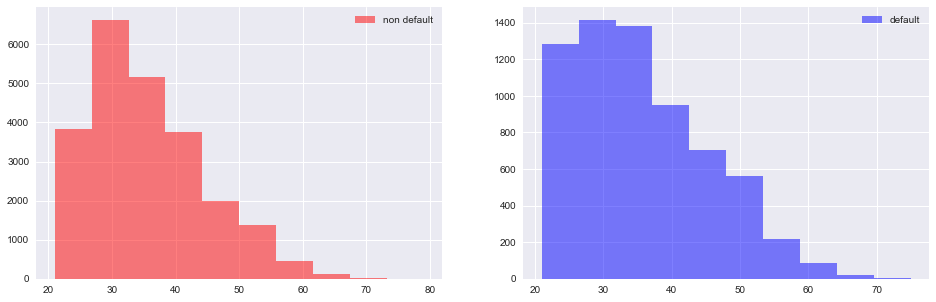

In [44]:
pylab.figure(figsize(16, 5))

pylab.subplot(1,2,1)
pylab.hist(non_default_ages, color = 'r', label = 'non default', alpha=0.5)
pylab.legend()

pylab.subplot(1,2,2)
pylab.hist(default_ages, color = 'b', label = 'default', alpha=0.5)
pylab.legend();

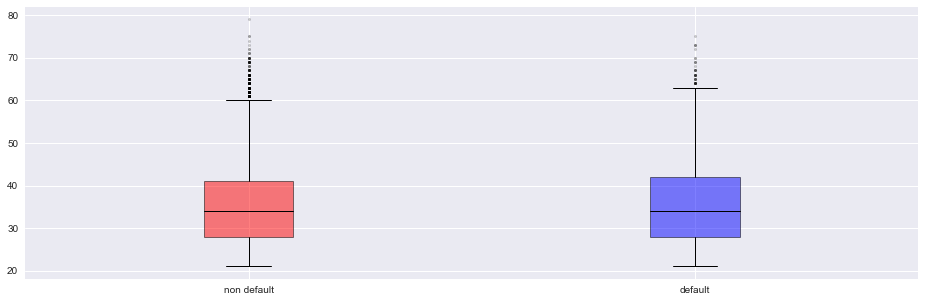

In [45]:
fig = plt.figure(1, figsize=(16, 5))
ax = fig.add_subplot(111)

bp = ax.boxplot([non_default_ages, default_ages], 
                patch_artist=True,  
                widths=0.2,
                showfliers=True,
                sym='k.')

for patch, color in zip(bp['boxes'], ['r', 'b']):
    patch.set_facecolor(color)
    patch.set_alpha(0.5)
    
for median in bp['medians']:
    median.set(color='k', linewidth=1)

    
for flier in bp['fliers']: 
    flier.set(marker='.', alpha=0.2)
    
ax.set_xticklabels(['non default', 'default']);

Про распределение такой статистики как медиана нам ничего неизвестно, поэтому воспользуемся методом **Bootstap** для построения доверительных интервалов и последующей проверки нулевой гипотезы. 

* **гипотеза $H_0$:** медианы AGE у людей, кто вернул и не вернул кредит одинаковы.
* **гипотеза $H_1$:** медианы AGE у людей, кто вернул и не вернул кредит различны.
* **уровень значимости:** 0.05

Все необоходимые методы для вычислений были определены в Задании 1.

#### Интервальная оценка медианы

In [46]:
np.random.seed(0)

non_default_ages_median_scores = list(map(np.median, get_bootstrap_samples(non_default_ages, 1000)))
default_ages_median_scores = list(map(np.median, get_bootstrap_samples(default_ages, 1000)))

print("95% confidence interval for the non default median AGE:",  stat_intervals(non_default_ages_median_scores, 0.05)) 
print("95% confidence interval for the default median AGE:",  stat_intervals(default_ages_median_scores, 0.05)) 

95% confidence interval for the non default median AGE: [ 34.  34.]
95% confidence interval for the default median AGE: [ 34.  35.]


Доверительный интвервал медианы AGE для людей, вернувших кредит, пересекается с доверительным интервалом для не вернувших кредит. Таким образом, гипотеза $H_0$ при заданном уровне значимости не может быть отвергнута.

#### Интервальная оценка разности медиан

In [47]:
delta_median_scores = list(map(lambda x: x[0] - x[1], zip(non_default_ages_median_scores, default_ages_median_scores)))
print("95% confidence interval for the difference between medians",  stat_intervals(delta_median_scores, 0.05)) 

95% confidence interval for the difference between medians [-1.  0.]


Таким образом, с 95% вероятностью можно утверждать, что медианы рассматриваемых величин одинаковы.

#### Проверка гипотезы о равенстве распределений на основе непараметрического критерия равенства средних

В качестве критерия будем использовать ранговый критерий **Манна-Уитни**
* **гипотеза $H_0$**: средние значения AGE для людей вернувших и невернувших кредит равны
* **гипотеза $H_1$**: средние значения AGE для людей вернувших и невернувших кредит не равны
* **уровень значимости:** 0.05

In [48]:
stats.mannwhitneyu(non_default_ages, default_ages)

MannwhitneyuResult(statistic=76966879.5, pvalue=0.18625177174493079)

Значение достигаемого уровня значимости согласно критерию Манна-Уитни получилось больше заданного уровня значимости. Таким образом, при заданном уровне значимости гипотеза **$H_0$** не может быть отвергнута.

In [49]:
np.median(non_default_ages) - np.median(default_ages)

0.0

**Ответ:**
- Гипотеза о равенстве медианных значений возрастов людей не отвергается
- Гипотеза о равенстве распределений не отвергается
- Практическая значимость: медианный возраст людей вернувших и не вернувших долг не отличается

---